In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Housing Prices Kaggle Competition/train.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df.isna().sum() / len(df) * 100)

missing_percentage = df.isna().sum() / len(df) * 100

threshold = 80
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

df.drop(columns=columns_to_drop, inplace=True)

print(f"\nColumnas eliminadas (más del {threshold}% de valores faltantes):")
if columns_to_drop:
    for col in columns_to_drop:
        print(f"- {col}")
else:
    print("Ninguna columna superó el umbral de NaNs.")


print("\nDataFrame después de eliminar columnas (primeras filas):")
print(df.head())

print("\nPorcentaje de valores faltantes por columna después de eliminar:")
print(df.isna().sum() / len(df) * 100)


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    if df[col].isna().any():  # Solo procesa si la columna tiene valores faltantes
        column_mean = df[col].mean()
        df[col].fillna(column_mean, inplace=True)
        print(f"  - Columna '{col}': Valores faltantes rellenados con la media ({column_mean:.2f})")

print("\n--- DataFrame después de imputar (primeras filas) ---")
print(df.head())
print("\n--- Conteo de NaNs por columna después de imputar (deberían ser 0 en numéricas) ---")
print(df.isna().sum())

  - Columna 'LotFrontage': Valores faltantes rellenados con la media (70.05)
  - Columna 'MasVnrArea': Valores faltantes rellenados con la media (103.69)
  - Columna 'GarageYrBlt': Valores faltantes rellenados con la media (1978.51)

--- DataFrame después de imputar (primeras filas) ---
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1F

/tmp/ipython-input-89-3771150264.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(column_mean, inplace=True)


In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    if df[col].isna().any():
        df[col].fillna(column_mode, inplace=True)

/tmp/ipython-input-90-3720437529.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(column_mode, inplace=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

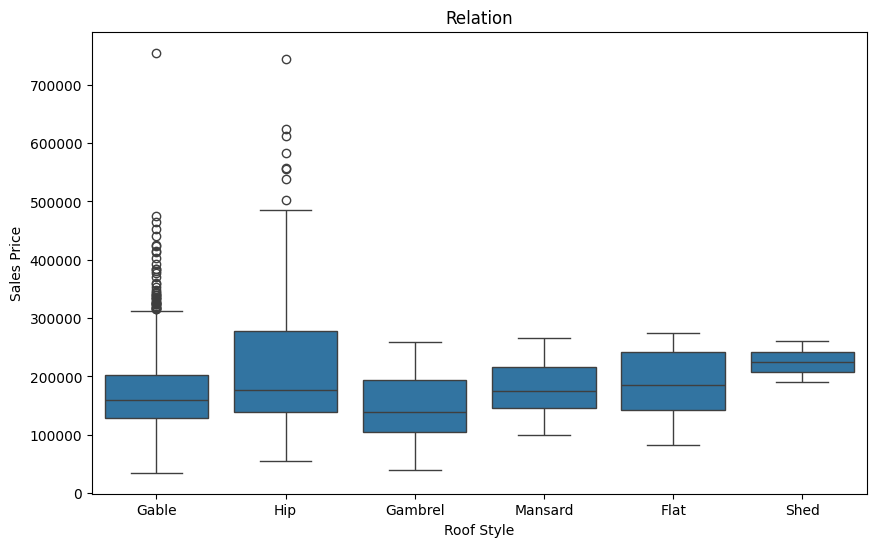

In [ ]:
columna_x = 'RoofStyle'
columna_y = 'SalePrice'

plt.figure(figsize=(10, 6))
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)
plt.title('Relation')
plt.xlabel('Roof Style')
plt.ylabel('Sales Price')
plt.show()

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,TA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


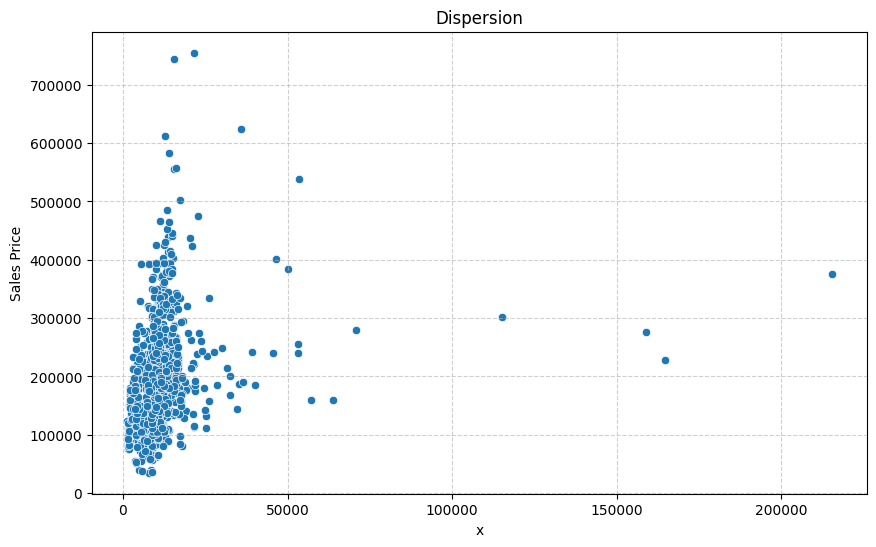

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)

plt.title(f'Dispersion')
plt.xlabel('x')
plt.ylabel('Sales Price')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nColumnas categóricas identificadas para One-Hot Encoding: {categorical_cols}")


Columnas categóricas identificadas para One-Hot Encoding: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.dtypes)

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPo

In [ ]:
target_variable_name = 'SalePrice'
features_to_normalize = df_encoded.select_dtypes(include=np.number).columns.tolist()
if target_variable_name in features_to_normalize:
    features_to_normalize.remove(target_variable_name)

In [ ]:
scaler = MinMaxScaler()

df_scaled = df_encoded.copy()
df_scaled[features_to_normalize] = scaler.fit_transform(df_encoded[features_to_normalize])

print("\n--- DataFrame escalado (primeras 5 filas) ---")
print(df_scaled.head())
print("\n--- Estadísticas descriptivas después de normalizar (solo features escaladas) ---")
print(df_scaled[features_to_normalize].describe())


print(f"\nValores de la variable de salida '{target_variable_name}' (sin escalar):")
print(df_scaled[target_variable_name].head())


--- DataFrame escalado (primeras 5 filas) ---
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.000000    0.235294     0.150685  0.033420     0.666667        0.500   
1  0.000685    0.000000     0.202055  0.038795     0.555556        0.875   
2  0.001371    0.235294     0.160959  0.046507     0.666667        0.500   
3  0.002056    0.294118     0.133562  0.038561     0.666667        0.500   
4  0.002742    0.235294     0.215753  0.060576     0.777778        0.500   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   0.949275      0.883333     0.12250    0.125089         0.0   0.064212   
1   0.753623      0.433333     0.00000    0.173281         0.0   0.121575   
2   0.934783      0.866667     0.10125    0.086109         0.0   0.185788   
3   0.311594      0.333333     0.00000    0.038271         0.0   0.231164   
4   0.927536      0.833333     0.21875    0.116052         0.0   0.209760   

   TotalBsmtSF  1stFlrSF  2ndFlrS

In [ ]:

print("\n--- Matriz de Correlación (Características de Entrada vs. Variable de Salida) ---")


all_features = [col for col in df_encoded.columns if col != target_variable_name]

correlations = df_encoded[all_features].corrwith(df_encoded[target_variable_name])

correlations_sorted = correlations.abs().sort_values(ascending=False)

print("\nCorrelación Absoluta de las Características de Entrada con la Variable de Salida:")
print(correlations_sorted)




--- Matriz de Correlación (Características de Entrada vs. Variable de Salida) ---

Correlación Absoluta de las Características de Entrada con la Variable de Salida:
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
ExterQual_TA             0.589044
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
KitchenQual_TA           0.519298
YearRemodAdd             0.507101
BsmtQual_TA              0.498545
Foundation_PConc         0.497734
MasVnrArea               0.475241
GarageYrBlt              0.470177
Fireplaces               0.466929
ExterQual_Gd             0.452466
BsmtFinType1_GLQ         0.434597
GarageFinish_Unf         0.410608
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
MasVnrType_TA            0.367456
FireplaceQu_TA           0.363679
SaleType_New      

In [ ]:
df_scaled.drop(columns=['Id'], inplace=True, errors='ignore')
df_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_TA,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_TA,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_TA,GarageFinish_RFn,GarageFinish_TA,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.33333

In [ ]:
columns_to_drop_low_corr = [
    'BsmtFinType2_GLQ',
    'RoofMatl_Metal',
    'RoofStyle_Mansard',
    'GarageCond_Gd',
    'Foundation_Wood',
    'Condition2_RRAe',
    'BldgType_TwnhsE',
    'Condition1_RRNe',
    'RoofMatl_Tar&Grv'
]

df_scaled.drop(columns=columns_to_drop_low_corr, inplace=True, errors='ignore')

print(f"\nColumnas eliminadas: {columns_to_drop_low_corr}")

print("\n--- DataFrame df_scaled después de eliminar columnas (primeras 5 filas) ---")
print(df_scaled.head())
print(f"\nDimensiones del DataFrame después: {df_scaled.shape}")


Columnas eliminadas: ['BsmtFinType2_GLQ', 'RoofMatl_Metal', 'RoofStyle_Mansard', 'GarageCond_Gd', 'Foundation_Wood', 'Condition2_RRAe', 'BldgType_TwnhsE', 'Condition1_RRNe', 'RoofMatl_Tar&Grv']

--- DataFrame df_scaled después de eliminar columnas (primeras 5 filas) ---
   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.883333     0.12250    0.125089         0.0   0.064212     0.140098   
1      0.433333     0.00000    0.173281         0.0   0.121575     0.206547   
2      0.866667     0.10125 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_scaled.drop(columns=[target_variable_name])
y = df_scaled[target_variable_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\n--- Modelo Random Forest Regressor inicializado ---")
print(model)


--- Modelo Random Forest Regressor inicializado ---
RandomForestRegressor(n_jobs=-1, random_state=42)


In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calcula la raíz cuadrada del MSE
r2 = r2_score(y_test, y_pred)

print("\n--- Resultados de la Evaluación del Modelo ---")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R2 Score): {r2:.2f}")



--- Resultados de la Evaluación del Modelo ---
Error Absoluto Medio (MAE): 17506.01
Error Cuadrático Medio (MSE): 811378395.18
Raíz del Error Cuadrático Medio (RMSE): 28484.70
Coeficiente de Determinación (R2 Score): 0.89


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # Probar 100, 200, 300 árboles
    'max_features': ['sqrt', 'log2', 0.8], # Probar sqrt(n_features), log2(n_features), 80% de features
    'max_depth': [10, 20], # Probar profundidad 10, 20, o sin límite (None)
    'min_samples_split': [2, 5] # Probar mínimo 2, 5 o 10 muestras para dividir
}

base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5, # Validación cruzada de 5 pliegues
    scoring='neg_mean_squared_error', # Optimizar para minimizar el MSE
    verbose=2, # Muestra detalles del progreso
    n_jobs=-1 # Usa todos los núcleos de CPU para paralelizar la búsqueda
)

print("--- Ejecutando GridSearchCV. Esto puede tomar un tiempo... ---")
grid_search.fit(X_train, y_train)

print("\n--- Búsqueda de hiperparámetros completada ---")

--- Ejecutando GridSearchCV. Esto puede tomar un tiempo... ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Búsqueda de hiperparámetros completada ---


In [ ]:
print("\nMejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

print(f"\nMejor MSE (Validación Cruzada): {-grid_search.best_score_:.2f}")


best_model = grid_search.best_estimator_
print("\n--- Mejor modelo encontrado ---")
print(best_model)

print("\n--- Evaluando el mejor modelo en el conjunto de prueba ---")
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\n--- Resultados de la Evaluación del Mejor Modelo ---")
print(f"Error Absoluto Medio (MAE) ajustado: {mae_tuned:.2f}")
print(f"Error Cuadrático Medio (MSE) ajustado: {mse_tuned:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) ajustado: {rmse_tuned:.2f}")
print(f"Coeficiente de Determinación (R2 Score) ajustado: {r2_tuned:.2f}")


Mejores parámetros encontrados por GridSearchCV:
{'max_depth': 10, 'max_features': 0.8, 'min_samples_split': 5, 'n_estimators': 100}

Mejor MSE (Validación Cruzada): 931478319.45

--- Mejor modelo encontrado ---
RandomForestRegressor(max_depth=10, max_features=0.8, min_samples_split=5,
                      n_jobs=-1, random_state=42)

--- Evaluando el mejor modelo en el conjunto de prueba ---

--- Resultados de la Evaluación del Mejor Modelo ---
Error Absoluto Medio (MAE) ajustado: 17462.17
Error Cuadrático Medio (MSE) ajustado: 793164307.79
Raíz del Error Cuadrático Medio (RMSE) ajustado: 28163.17
Coeficiente de Determinación (R2 Score) ajustado: 0.90

--- Fin del ajuste de hiperparámetros y evaluación ---


In [ ]:
from google.colab import files
import joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive, files

# --- 1. Montar Google Drive ---
print("--- Montando Google Drive ---")
drive.mount('/content/drive')

# Definir la ruta base para tus archivos CSV
base_path = '/content/drive/MyDrive/Colab Notebooks/Housing Prices Kaggle Competition/'
train_file_path = base_path + 'train.csv'
test_file_path = base_path + 'test.csv'

# --- 2. Cargar el Dataset de Entrenamiento ---
print("\n--- Cargando el dataset de entrenamiento ---")
df = pd.read_csv(train_file_path)
print(f"Dimensiones del DataFrame de entrenamiento original: {df.shape}")
# Guardar los IDs del entrenamiento si fueran necesarios para algo más,
# pero para este problema no lo son.
# train_ids = df['Id']


# --- 3. Preprocesamiento del Dataset de Entrenamiento ---

# Configurar opciones de visualización para ver todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("\n--- Porcentaje de valores faltantes iniciales en el entrenamiento ---")
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Eliminar columnas con un alto porcentaje de valores faltantes (más del 80%)
threshold = 80
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(f"\nColumnas eliminadas (más del {threshold}% de valores faltantes):")
if columns_to_drop:
    for col in columns_to_drop:
        print(f"- {col}")
else:
    print("Ninguna columna superó el umbral de NaNs.")

print("\n--- DataFrame de entrenamiento después de eliminar columnas (primeras filas) ---")
print(df.head())
print(f"Dimensiones del DataFrame de entrenamiento después de eliminar columnas: {df.shape}")


# Eliminar la columna 'Id' del dataset de entrenamiento, ya que no es una característica
# ni se necesita para la salida final de este problema (solo para el dataset de test).
df.drop(columns=['Id'], inplace=True, errors='ignore')
print("\nColumna 'Id' eliminada del DataFrame de entrenamiento.")


# Imputar valores faltantes en columnas numéricas con la media
print("\n--- Imputando valores faltantes en columnas numéricas (entrenamiento) ---")
numeric_cols = df.select_dtypes(include=np.number).columns
# Excluimos la variable objetivo 'SalePrice' de la imputación de medias.
numeric_cols_for_imputation = [col for col in numeric_cols if col != 'SalePrice']

train_numeric_means = df[numeric_cols_for_imputation].mean() # Guardar las medias para el test set

for col in numeric_cols_for_imputation:
    if df[col].isna().any():
        df[col].fillna(train_numeric_means[col], inplace=True)
        # print(f"  - Columna '{col}': Valores faltantes rellenados con la media ({train_numeric_means[col]:.2f})")

# Imputar valores faltantes en columnas no numéricas con la moda
print("\n--- Imputando valores faltantes en columnas no numéricas (entrenamiento) ---")
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()
train_categorical_modes = {col: df[col].mode()[0] for col in non_numeric_cols if df[col].isna().any()} # Guardar las modas para el test set

for col in non_numeric_cols:
    if df[col].isna().any():
        df[col].fillna(train_categorical_modes[col], inplace=True)
        # print(f"  - Columna '{col}': Valores faltantes rellenados con la moda ({train_categorical_modes[col]})")

print("\n--- Conteo de NaNs por columna después de imputar (entrenamiento) ---")
print(df.isna().sum().sum()) # Debería ser 0 para todas las columnas procesadas


# Realizar One-Hot Encoding para columnas categóricas
print("\n--- Realizando One-Hot Encoding (entrenamiento) ---")
categorical_cols_train = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols_train, drop_first=True) # drop_first=True para evitar la trampa de las dummies

print(f"Dimensiones del DataFrame después de One-Hot Encoding: {df_encoded.shape}")
# print(df_encoded.dtypes.value_counts()) # Para verificar los tipos de datos

# Definir la variable objetivo
target_variable_name = 'SalePrice'

# Identificar las características numéricas a escalar (excluyendo la variable objetivo)
features_to_normalize = df_encoded.select_dtypes(include=np.number).columns.tolist()
if target_variable_name in features_to_normalize:
    features_to_normalize.remove(target_variable_name)

# Inicializar y ajustar el escalador (MinMaxScaler) en el conjunto de entrenamiento
scaler = MinMaxScaler()
# Aseguramos que el escalador solo vea las características que debe escalar
df_scaled = df_encoded.copy()
df_scaled[features_to_normalize] = scaler.fit_transform(df_encoded[features_to_normalize])

print("\n--- DataFrame de entrenamiento escalado (primeras 5 filas) ---")
print(df_scaled.head())
print("\n--- Estadísticas descriptivas después de normalizar (solo features escaladas) ---")
print(df_scaled[features_to_normalize].describe())


# Eliminar columnas con baja correlación con SalePrice (si se identificaron así en el análisis previo)
# Estas columnas se definieron en tu código original. Aseguramos que se apliquen aquí.
columns_to_drop_low_corr = [
    'BsmtFinType2_GLQ',
    'RoofMatl_Metal',
    'RoofStyle_Mansard',
    'GarageCond_Gd',
    'RoofMatl_Tar&Grv', # Re-añadida por si acaso
    'Foundation_Wood',
    'Condition2_RRAe',
    'BldgType_TwnhsE',
    'Condition1_RRNe',
]
df_scaled.drop(columns=columns_to_drop_low_corr, inplace=True, errors='ignore')

print(f"\nColumnas eliminadas por baja correlación: {columns_to_drop_low_corr}")
print(f"Dimensiones del DataFrame de entrenamiento después de eliminar columnas de baja correlación: {df_scaled.shape}")


# --- 4. División de Datos para Entrenamiento y Validación del Modelo ---
print("\n--- Dividiendo el dataset para entrenamiento y validación del modelo ---")
X = df_scaled.drop(columns=[target_variable_name]) # Características de entrada
y = df_scaled[target_variable_name]                 # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

# --- 5. Entrenamiento y Evaluación del Modelo Base (Random Forest) ---
print("\n--- Iniciando entrenamiento y evaluación del modelo base ---")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\n--- Modelo Random Forest Regressor inicializado (Base) ---")
print(model)

print("\n--- Entrenando el modelo base ---")
model.fit(X_train, y_train)

print("\n--- Evaluando el modelo base en el conjunto de prueba ---")
y_pred_base = model.predict(X_test) # Renombrado para evitar conflicto con y_pred_tuned

mae_base = mean_absolute_error(y_test, y_pred_base)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_test, y_pred_base)

print("\n--- Resultados de la Evaluación del Modelo Base ---")
print(f"Error Absoluto Medio (MAE): {mae_base:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_base:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_base:.2f}")
print(f"Coeficiente de Determinación (R2 Score): {r2_base:.2f}")


# --- 6. Optimización de Hiperparámetros con GridSearchCV ---
print("\n--- Iniciando búsqueda de hiperparámetros con GridSearchCV ---")

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2', 0.8],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

base_model_grid = RandomForestRegressor(random_state=42, n_jobs=-1) # Usar un nombre diferente para evitar confusión

grid_search = GridSearchCV(
    estimator=base_model_grid,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

print("--- Ejecutando GridSearchCV. Esto puede tomar un tiempo... ---")
grid_search.fit(X_train, y_train)

print("\n--- Búsqueda de hiperparámetros completada ---")

print("\nMejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

print(f"\nMejor MSE (Validación Cruzada): {-grid_search.best_score_:.2f}")


# --- 7. Evaluación del Mejor Modelo Encontrado ---
best_model = grid_search.best_estimator_
print("\n--- Mejor modelo encontrado ---")
print(best_model)

print("\n--- Evaluando el mejor modelo en el conjunto de prueba ---")
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\n--- Resultados de la Evaluación del Mejor Modelo ---")
print(f"Error Absoluto Medio (MAE) ajustado: {mae_tuned:.2f}")
print(f"Error Cuadrático Medio (MSE) ajustado: {mse_tuned:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) ajustado: {rmse_tuned:.2f}")
print(f"Coeficiente de Determinación (R2 Score) ajustado: {r2_tuned:.2f}")


# --- 8. Preprocesar el Dataset de Prueba de Kaggle y Generar Predicciones ---
print("\n--- Preparando el dataset de test de Kaggle para la predicción ---")

df_test = pd.read_csv(test_file_path)
print(f"Dimensiones del Test DataFrame original de Kaggle: {df_test.shape}")

# Guardar los IDs del test set para la submission
test_ids = df_test['Id']
# Eliminar 'Id' del test set para el preprocesamiento
df_test.drop(columns=['Id'], inplace=True, errors='ignore')


# Aplicar la misma eliminación de columnas con alto porcentaje de NaNs (usando 'columns_to_drop' del entrenamiento)
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(f"Test DataFrame después de eliminar columnas de alto NaN: {df_test.shape}")

# Imputar valores numéricos faltantes con las medias del entrenamiento
numeric_cols_test = df_test.select_dtypes(include=np.number).columns
for col in numeric_cols_test:
    if df_test[col].isna().any():
        if col in train_numeric_means:
            df_test[col].fillna(train_numeric_means[col], inplace=True)
        else: # Fallback por si una columna numérica en test no estaba en train_numeric_means (raro)
            df_test[col].fillna(df_test[col].mean(), inplace=True)

# Imputar valores no numéricos faltantes con las modas del entrenamiento
# 'non_numeric_cols' y 'train_categorical_modes' se definieron del entrenamiento
for col in non_numeric_cols: # Usamos la lista de columnas categóricas del entrenamiento
    if col in df_test.columns and df_test[col].isna().any():
        if col in train_categorical_modes:
            df_test[col].fillna(train_categorical_modes[col], inplace=True)
        else: # Fallback para columnas categóricas no vistas en entrenamiento
            df_test[col].fillna(df_test[col].mode()[0], inplace=True)

print(f"Total de NaNs en el Test DataFrame después de imputación: {df_test.isna().sum().sum()}")


# Realizar One-Hot Encoding en el test set, usando las columnas categóricas del entrenamiento
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols_train, drop_first=True)

# Alineación de columnas: CRUCIAL para que las columnas del test set coincidan con las del entrenamiento
train_features_cols = X.columns # X es tu conjunto final de características del entrenamiento
df_test_aligned = df_test_encoded.reindex(columns=train_features_cols, fill_value=0)

print(f"Test DataFrame después de One-Hot Encoding y alineación de columnas: {df_test_aligned.shape}")


# Escalar las características numéricas del test set usando el 'scaler' ajustado en el entrenamiento
features_to_scale_in_test = [col for col in features_to_normalize if col in df_test_aligned.columns]
df_test_scaled = df_test_aligned.copy()
df_test_scaled[features_to_scale_in_test] = scaler.transform(df_test_aligned[features_to_scale_in_test])

print(f"Test DataFrame después de escalar: {df_test_scaled.shape}")


# Eliminar columnas con baja correlación del test set (usando 'columns_to_drop_low_corr' del entrenamiento)
df_test_scaled.drop(columns=columns_to_drop_low_corr, inplace=True, errors='ignore')
print(f"Test DataFrame después de eliminar columnas de baja correlación: {df_test_scaled.shape}")


# Asegurar que el orden y el conjunto de columnas del test set final coincidan exactamente con X_train
# Esto es una doble verificación para la robustez antes de la predicción.
df_test_final = df_test_scaled[X_train.columns]

print(f"\nFinal Test DataFrame columns match X_train columns: {list(df_test_final.columns) == list(X_train.columns)}")
print(f"Dimensiones del Test DataFrame final para predicción: {df_test_final.shape}")


# --- 9. Generar Predicciones y Crear el Archivo de Submission ---
print("\n--- Generando predicciones en el dataset de test de Kaggle ---")
kaggle_predictions = best_model.predict(df_test_final)

print(f"Número de predicciones generadas: {len(kaggle_predictions)}")


# Crear el DataFrame para la submission en Kaggle
submission_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': kaggle_predictions
})

print("\n--- DataFrame de Submission final (primeras 5 filas) ---")
print(submission_df.head())
print(f"Dimensiones del DataFrame de Submission: {submission_df.shape}")


# Definir la ruta y guardar el archivo de submission
submission_file_path = base_path + 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"\n--- Archivo de submission guardado exitosamente en: {submission_file_path} ---")

# Si quieres descargar el archivo directamente a tu máquina local
# files.download(submission_file_path)

print("\n--- ¡Proceso completado! Puedes subir 'submission.csv' a Kaggle. ---")

--- Montando Google Drive ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Cargando el dataset de entrenamiento ---
Dimensiones del DataFrame de entrenamiento original: (1460, 81)

--- Porcentaje de valores faltantes iniciales en el entrenamiento ---
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Columnas eliminadas (más del 80% de valores faltantes):
- Alley
- PoolQC
- Fence
- MiscFeature

--- DataFrame de entrenamiento después de eliminar col

/tmp/ipython-input-129-2247782822.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(train_numeric_means[col], inplace=True)
/tmp/ipython-input-129-2247782822.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

        MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.217043     0.167979     0.043080     0.566591     0.571918   
std       0.248827     0.075425     0.046653     0.153666     0.139100   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.133562     0.029229     0.444444     0.500000   
50%       0.176471     0.167979     0.038227     0.555556     0.500000   
75%       0.294118     0.198630     0.048150     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.719332      0.581096     0.064803     0.078604     0.031580   
std       0.218862      0.344090     0.112856     0.080811     0.109443   
min       0.000000      0.000000 

/tmp/ipython-input-129-2247782822.py:246: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col].fillna(train_numeric_means[col], inplace=True)
/tmp/ipython-input-129-2247782822.py:257: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

Test DataFrame después de One-Hot Encoding y alineación de columnas: (1459, 226)
Test DataFrame después de escalar: (1459, 226)
Test DataFrame después de eliminar columnas de baja correlación: (1459, 226)

Final Test DataFrame columns match X_train columns: True
Dimensiones del Test DataFrame final para predicción: (1459, 226)

--- Generando predicciones en el dataset de test de Kaggle ---
Número de predicciones generadas: 1459

--- DataFrame de Submission final (primeras 5 filas) ---
     Id      SalePrice
0  1461  127398.805682
1  1462  156799.500000
2  1463  182156.770000
3  1464  185953.266310
4  1465  207801.280000
Dimensiones del DataFrame de Submission: (1459, 2)

--- Archivo de submission guardado exitosamente en: /content/drive/MyDrive/Colab Notebooks/Housing Prices Kaggle Competition/submission.csv ---

--- ¡Proceso completado! Puedes subir 'submission.csv' a Kaggle. ---
